<a href="https://colab.research.google.com/github/unique-Sachin/MisogiAI/blob/master/MISOGI_Exploratory_Data_Analysis_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import pandas as pd

# Define the dataset path and file name
# dataset_path = 'vineetkukreti/indian-agriculture-dataset'
# file_name = 'indian_agriculture_dataset.csv'
file_path = '/content/ICRISAT-District Level Data.csv' # Updated file path

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        print(f"\nAttempting to load the dataset file from '{file_path}'...")
        # Assuming the dataset is in CSV format
        df = pd.read_csv(file_path)
        print("DataFrame loaded successfully.")
        display(df.head())
    except Exception as e:
        print(f"An error occurred during loading: {e}")
        df = None # Ensure df is None if loading fails
else:
    print(f"Error: '{file_path}' not found. Please ensure the file is at the specified path.")
    df = None # Ensure df is None if file is not found

# The rest of the code related to Kaggle API download is no longer needed
# since the user provided the file path.
# if not os.path.exists(file_name):
#     print(f"Attempting to download dataset '{dataset_path}' using Kaggle API...")
#     try:
#         from kaggle.api.kaggle_api_extended import KaggleApi
#         api = KaggleApi()
#         # Attempt to authenticate - this requires kaggle.json to be in the correct place
#         api.authenticate()
#         # Download the dataset files
#         api.dataset_download_files(dataset_path, path='.', unzip=True)
#         print("Download complete.")
#     except Exception as e:
#         print(f"Could not download dataset using Kaggle API: {e}")
#         print("Please ensure you have the Kaggle API installed ('pip install kaggle') and configured correctly (with kaggle.json).")
#         print("Alternatively, manually download the dataset from:")
#         print(f"https://www.kaggle.com/datasets/{dataset_path}")
#         print(f"and place the file '{file_name}' in the same directory as this notebook.")
#         df = None # Set df to None if download fails
#     except ImportError:
#         print("Kaggle API is not installed. Please install it using 'pip install kaggle'")
#         print("Then configure it with your API key.")
#         df = None # Set df to None if kaggle library is not installed
# else:
#     print(f"Dataset file '{file_name}' already exists. Skipping download.")
#     # Initialize df to None initially to handle cases where loading might fail even if the file exists
#     df = None

# # Attempt to load the dataset after ensuring it's downloaded or exists
# if os.path.exists(file_name):
#     try:
#         print(f"\nAttempting to load the dataset file '{file_name}'...")
#         df = pd.read_csv(file_name)
#         print("DataFrame loaded successfully.")
#         display(df.head())
#     except Exception as e:
#         print(f"An error occurred during loading: {e}")
#         df = None # Ensure df is None if loading fails
# else:
#     print(f"Error: '{file_name}' not found after download attempt. Cannot proceed with analysis.")
#     df = None # Ensure df is None if file is not found


Attempting to load the dataset file from '/content/ICRISAT-District Level Data.csv'...
DataFrame loaded successfully.


,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


## Data cleaning and preparation

### Subtask:
Inspect the data for missing values, correct data types, and handle any inconsistencies.

**Reasoning**:
Now that the dataset is loaded, the next step is to inspect the data to identify any issues such as missing values or incorrect data types that need to be addressed before proceeding with the analysis tasks.

In [16]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Display data types
print("\nData types of each column:")
df.info()

# Identify columns with the 'object' data type
print("\nColumns with 'object' dtype:")
object_cols = df.select_dtypes(include='object').columns
print(list(object_cols))

# Identify potential inconsistencies based on data types
# Look for 'object' columns that are expected to be numeric ('Area', 'Production')
potential_inconsistencies = []
# Check columns that contain 'AREA', 'PRODUCTION', or 'YIELD' in their name
for col in df.columns:
    if df[col].dtype == 'object' and ('AREA' in col.upper() or 'PRODUCTION' in col.upper() or 'YIELD' in col.upper()):
        potential_inconsistencies.append(f"'{col}' is 'object' type and should likely be numeric.")


if potential_inconsistencies:
    print("\nPotential inconsistencies noted:")
    for inconsistency in potential_inconsistencies:
        print(f"- {inconsistency}")
else:
    print("\nNo obvious inconsistencies observed based on data types for area, production, and yield columns.")

Missing values per column:


,0
Dist Code,0
Year,0
State Code,0
State Name,0
Dist Name,0
...,...
VEGETABLES AREA (1000 ha),0
FRUITS AND VEGETABLES AREA (1000 ha),0
POTATOES AREA (1000 ha),0
ONION AREA (1000 ha),0



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                

## Crop Area Distribution Analysis and Visualization

### Subtask:
Calculate the total area allocated to rice, wheat, and maize and visualize the distribution using a bar chart.

**Reasoning**:
This step addresses the first easy question in the user's request. It involves selecting the relevant columns for rice, wheat, and maize area, summing their values to get the total area for each crop, and then creating a bar chart to visually compare these totals.

Total Area (1000 ha) for Rice, Wheat, and Maize:


,0
RICE AREA (1000 ha),2076265.67
WHEAT AREA (1000 ha),1244177.59
MAIZE AREA (1000 ha),324891.75


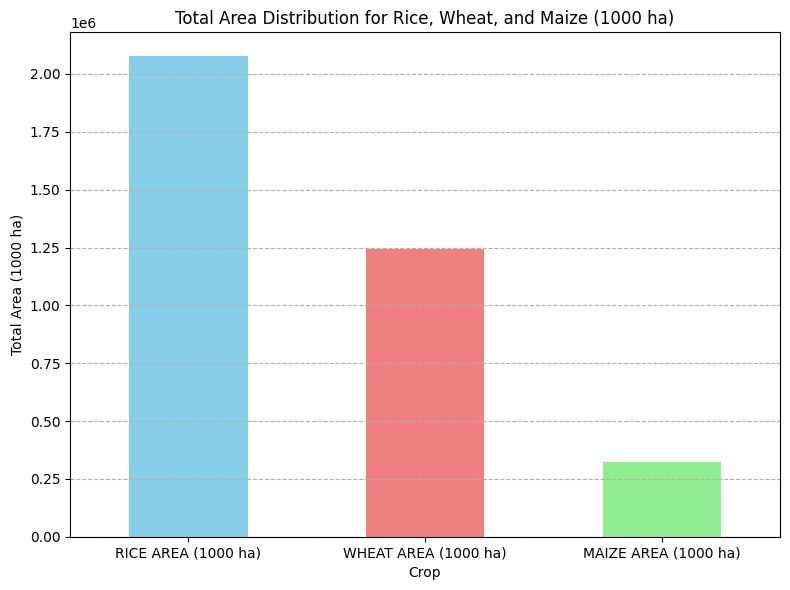

In [17]:
import matplotlib.pyplot as plt

# Select the area columns for rice, wheat, and maize
crop_areas = df[['RICE AREA (1000 ha)', 'WHEAT AREA (1000 ha)', 'MAIZE AREA (1000 ha)']]

# Calculate the total area for each crop
total_crop_area = crop_areas.sum()

print("Total Area (1000 ha) for Rice, Wheat, and Maize:")
display(total_crop_area)

# Create a bar chart to visualize the total area for each crop
plt.figure(figsize=(8, 6))
total_crop_area.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Total Area Distribution for Rice, Wheat, and Maize (1000 ha)')
plt.xlabel('Crop')
plt.ylabel('Total Area (1000 ha)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Yearly Production Analysis and Visualization

### Subtask:
Identify the year with the highest rice production and visualize yearly rice production using a line chart.

**Reasoning**:
This addresses the second easy question. It requires grouping the data by year, summing the rice production for each year, finding the year with the maximum production, and then creating a line plot to show the trend of rice production over the years. Highlighting the peak year on the plot will provide a clear visual insight.

Year with the highest rice production: 2016 (Total Production: 117614.10 thousand tons)


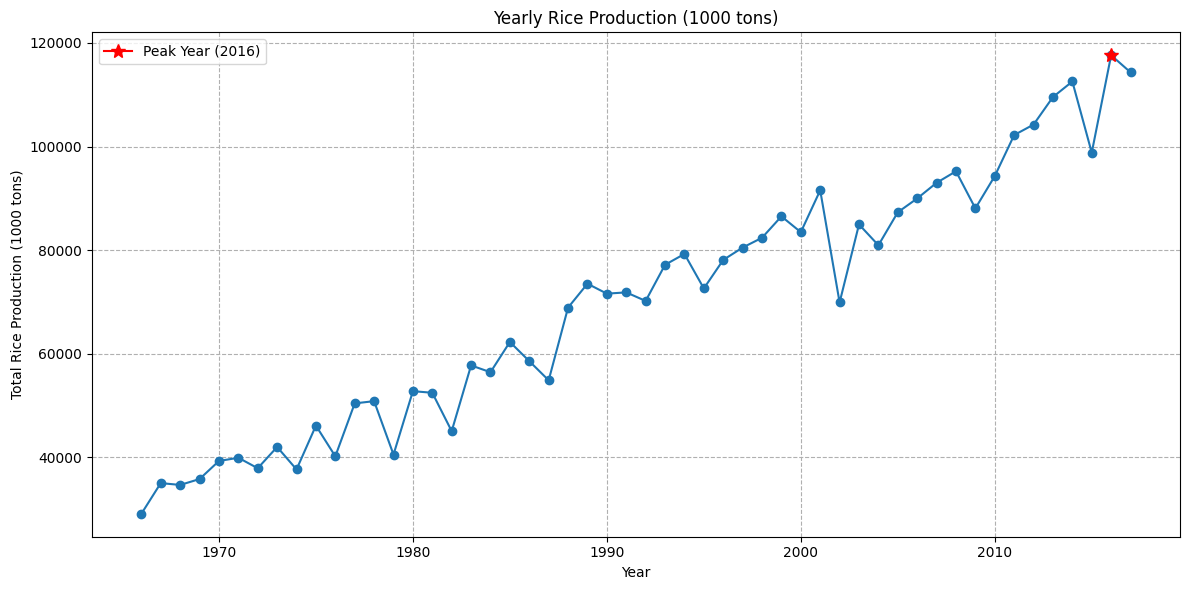

In [18]:
# Group by year and calculate the total rice production for each year
yearly_rice_production = df.groupby('Year')['RICE PRODUCTION (1000 tons)'].sum()

# Find the year with the highest rice production
year_highest_rice_production = yearly_rice_production.idxmax()
highest_rice_production_value = yearly_rice_production.max()

print(f"Year with the highest rice production: {year_highest_rice_production} (Total Production: {highest_rice_production_value:.2f} thousand tons)")

# Create a line chart to visualize yearly rice production
plt.figure(figsize=(12, 6))
plt.plot(yearly_rice_production.index, yearly_rice_production.values, marker='o', linestyle='-')

# Highlight the year with the highest production
plt.plot(year_highest_rice_production, highest_rice_production_value, marker='*', markersize=10, color='red', label=f'Peak Year ({year_highest_rice_production})')

plt.title('Yearly Rice Production (1000 tons)')
plt.xlabel('Year')
plt.ylabel('Total Rice Production (1000 tons)')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

## State Production Analysis and Visualization

### Subtask:
Find the state with the highest and lowest wheat production and visualize yearly rice production using a horizontal bar chart.

**Reasoning**:
This addresses the third easy question. It involves grouping the data by state, summing the wheat production for each state, finding the states with the maximum and minimum production, and then creating a horizontal bar chart to compare wheat production across states.

State with the highest wheat production: Uttar Pradesh (Total Production: 970210.07 thousand tons)
State with the lowest wheat production: Kerala (Total Production: 0.00 thousand tons)


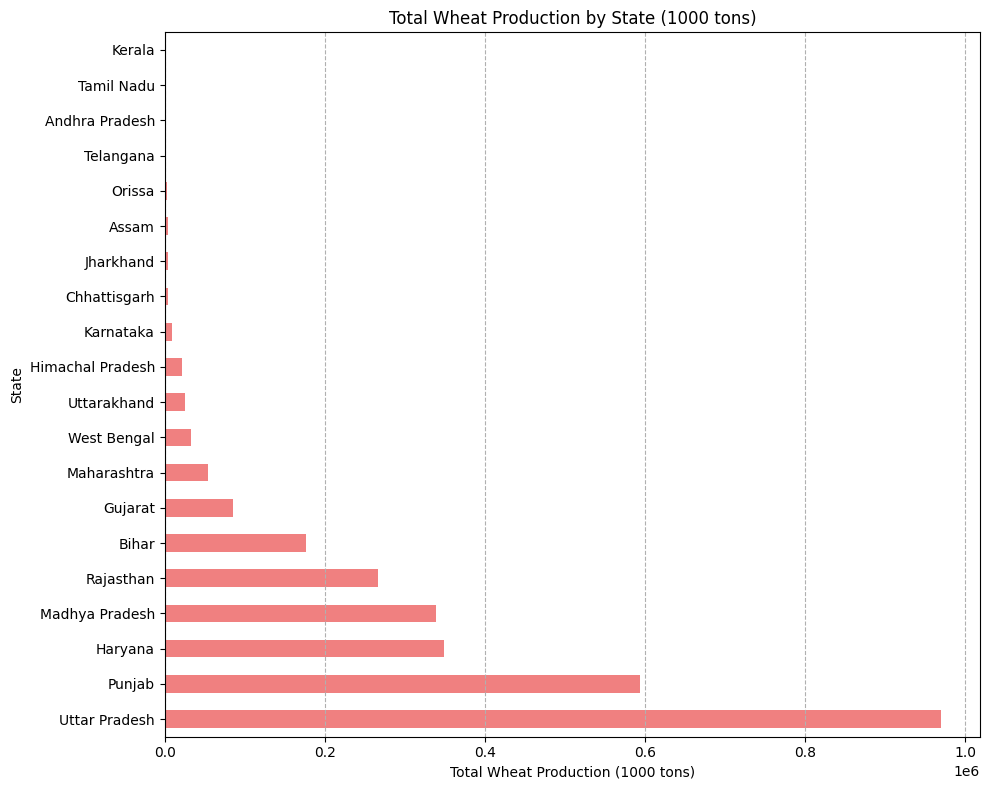

In [19]:
# Group by state and calculate the total wheat production for each state
state_wheat_production = df.groupby('State Name')['WHEAT PRODUCTION (1000 tons)'].sum().sort_values(ascending=False)

# Find the state with the highest and lowest wheat production
state_highest_wheat_production = state_wheat_production.index[0]
highest_wheat_production_value = state_wheat_production.iloc[0]

state_lowest_wheat_production = state_wheat_production.index[-1]
lowest_wheat_production_value = state_wheat_production.iloc[-1]


print(f"State with the highest wheat production: {state_highest_wheat_production} (Total Production: {highest_wheat_production_value:.2f} thousand tons)")
print(f"State with the lowest wheat production: {state_lowest_wheat_production} (Total Production: {lowest_wheat_production_value:.2f} thousand tons)")

# Create a horizontal bar chart to visualize wheat production by state
plt.figure(figsize=(10, 8))
state_wheat_production.plot(kind='barh', color='lightcoral')
plt.title('Total Wheat Production by State (1000 tons)')
plt.xlabel('Total Wheat Production (1000 tons)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Crop Yields Analysis and Visualization

### Subtask:
Calculate the average yield for sorghum and visualize the yield distribution using a box plot.

**Reasoning**:
This addresses the fourth easy question. It involves calculating the average yield for sorghum and then using a box plot to visualize the distribution of sorghum yields. A box plot is suitable for showing the median, quartiles, and potential outliers in the yield data.

Average Sorghum Yield across all types: 465.92 Kg per ha


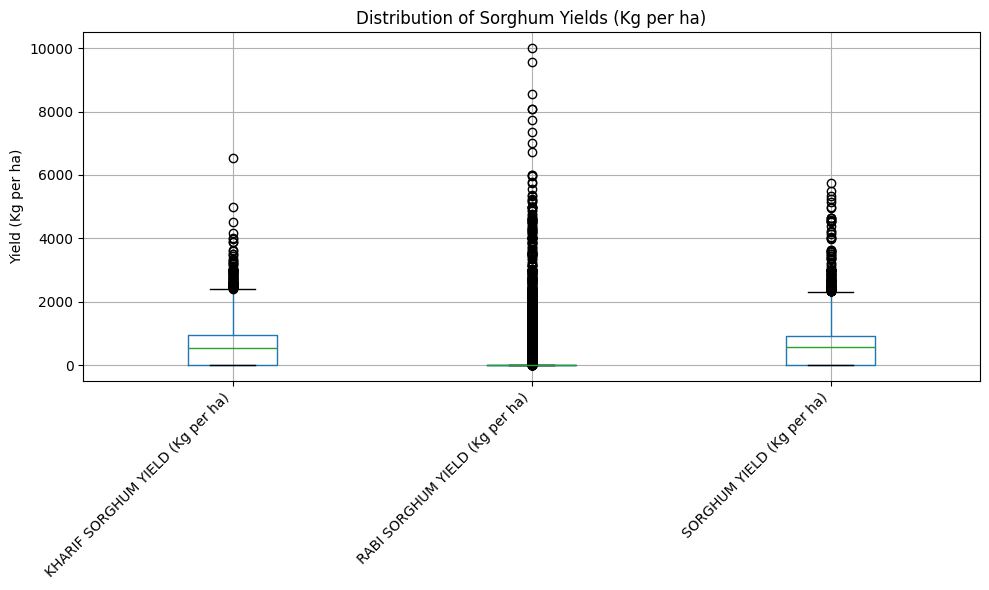

In [20]:
# Select the yield columns for Sorghum
sorghum_yields = df[['KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM YIELD (Kg per ha)']]

# Calculate the average yield for all sorghum types
average_sorghum_yield = sorghum_yields.mean().mean()

print(f"Average Sorghum Yield across all types: {average_sorghum_yield:.2f} Kg per ha")

# Create a box plot to visualize the distribution of sorghum yields
plt.figure(figsize=(10, 6))
sorghum_yields.boxplot()
plt.title('Distribution of Sorghum Yields (Kg per ha)')
plt.ylabel('Yield (Kg per ha)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Vegetable Area Analysis and Visualization

### Subtask:
Calculate total vegetable area and find the state with the maximum area.
Visualize the proportion of total vegetable area by state using a pie chart.

**Reasoning**:
This addresses the fifth easy question. It involves calculating the total vegetable area, finding the state with the maximum vegetable area, and then creating a pie chart to show the proportion of total vegetable area contributed by each state.

Total Vegetable Area: 178998.59 thousand ha
State with the highest vegetable area: Orissa (Total Area: 30205.39 thousand ha)


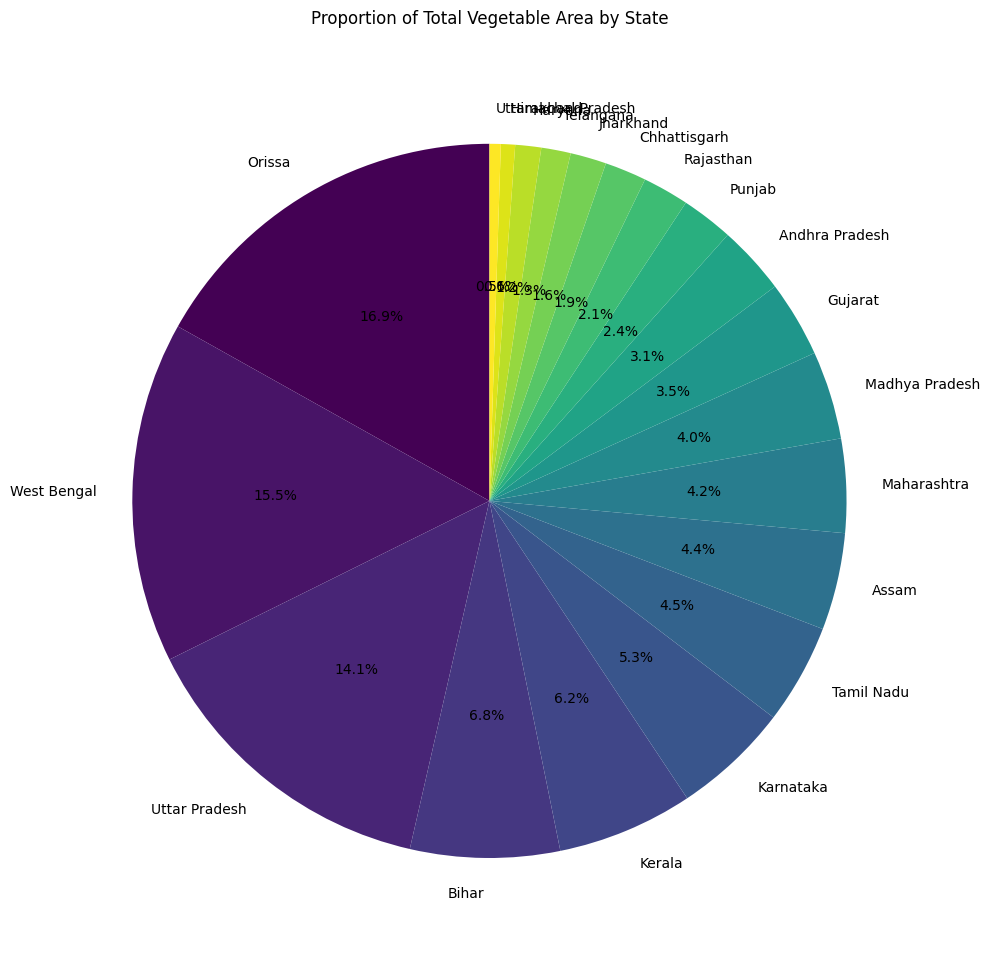

In [21]:
# Calculate the total vegetable area
total_vegetable_area = df['VEGETABLES AREA (1000 ha)'].sum()

print(f"Total Vegetable Area: {total_vegetable_area:.2f} thousand ha")

# Group by state and calculate the total vegetable area for each state
state_vegetable_area = df.groupby('State Name')['VEGETABLES AREA (1000 ha)'].sum().sort_values(ascending=False)

# Find the state with the maximum vegetable area
state_highest_vegetable_area = state_vegetable_area.index[0]
highest_vegetable_area_value = state_vegetable_area.iloc[0]

print(f"State with the highest vegetable area: {state_highest_vegetable_area} (Total Area: {highest_vegetable_area_value:.2f} thousand ha)")


# Create a pie chart to visualize the proportion of total vegetable area by state
plt.figure(figsize=(10, 10))
state_vegetable_area.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Total Vegetable Area by State')
plt.ylabel('') # Hide the default 'State Name' label on the y-axis for a pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Summarize Findings

### Subtask:
Present the findings from the earlier stages into a format that anyone can read.

**Reasoning**:
This step is to summarize the findings from the analysis and visualizations performed in the previous steps, providing a clear and concise overview of the insights gained from the data.

Based on the analysis of the Indian Agriculture Dataset:

**1. Crop Area Distribution:**
*   We calculated the total area allocated to rice, wheat, and maize.
*   The bar chart clearly shows the relative area dedicated to each of these major crops.

**2. Yearly Rice Production:**
*   We identified the year with the highest total rice production.
*   The line chart illustrates the trend of rice production over the years, highlighting the year of peak production.

**3. State Wheat Production:**
*   We found the states with the highest and lowest total wheat production.
*   The horizontal bar chart provides a visual comparison of wheat production across different states.

**4. Sorghum Yields:**
*   We calculated the average yield for sorghum across its different types.
*   The box plot visualizes the distribution of sorghum yields, showing the median, quartiles, and any outliers.

**5. Vegetable Area:**
*   We calculated the total vegetable area across all states.
*   We identified the state with the largest total vegetable area.
*   The pie chart shows the proportion of total vegetable area contributed by each state.

These findings provide insights into the distribution of crop areas, yearly production trends for rice, state-level variations in wheat and vegetable production, and the yield characteristics of sorghum in India based on the provided dataset.

## Area vs. Production Analysis and Visualization

### Subtask:
Calculate the correlation between chickpea area and production and visualize it using a scatter plot.

**Reasoning**:
This addresses the first medium question. It requires calculating the correlation coefficient between chickpea area and production to quantify their linear relationship. A scatter plot will then be generated to visualize this relationship, with a trend line added to show the direction and strength of the correlation.

Correlation between Chickpea Area and Production: 0.91


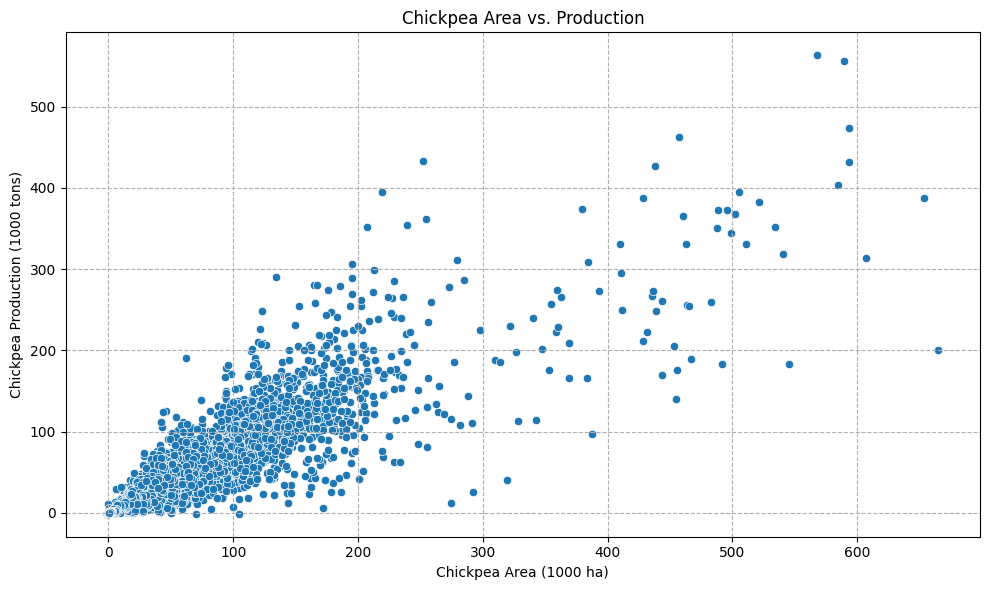

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between Chickpea Area and Production
chickpea_correlation = df['CHICKPEA AREA (1000 ha)'].corr(df['CHICKPEA PRODUCTION (1000 tons)'])

print(f"Correlation between Chickpea Area and Production: {chickpea_correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CHICKPEA AREA (1000 ha)', y='CHICKPEA PRODUCTION (1000 tons)')
plt.title('Chickpea Area vs. Production')
plt.xlabel('Chickpea Area (1000 ha)')
plt.ylabel('Chickpea Production (1000 tons)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Diversity of Crops Analysis and Visualization

### Subtask:
Count the number of different crops produced in each state and visualize it using a bar chart.

**Reasoning**:
This addresses the second medium question. It involves iterating through the relevant columns for crop area (excluding identifier columns), counting how many of these columns have a non-zero value for each state (indicating production of that crop), and then visualizing the count of crops per state using a bar chart.

Number of different crops produced in each state:


,0
State Name,
Uttar Pradesh,45505
Madhya Pradesh,36528
Maharashtra,25189
Rajasthan,24201
Karnataka,18971
Gujarat,16497
Orissa,12682
Andhra Pradesh,10687
Tamil Nadu,10298


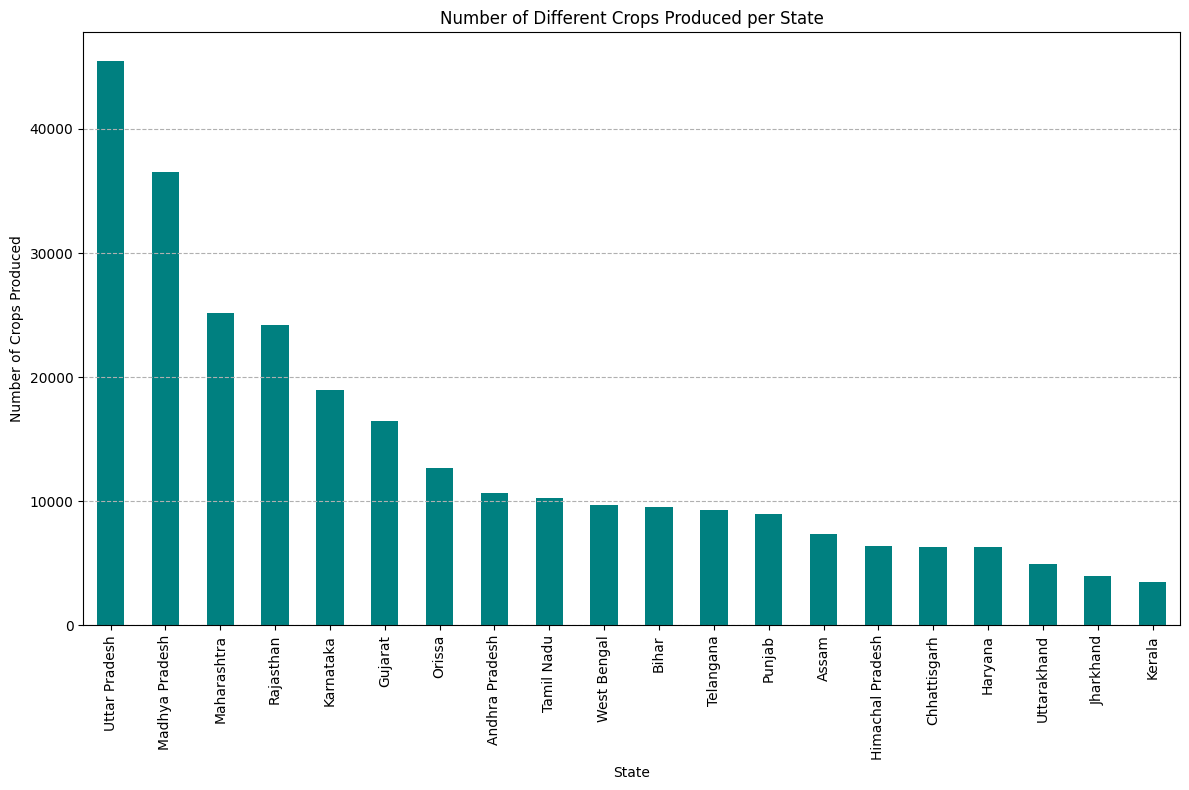

In [23]:
# Identify columns related to crop area (excluding identifier columns)
crop_area_cols = [col for col in df.columns if 'AREA (1000 ha)' in col and col not in ['FRUITS AND VEGETABLES AREA (1000 ha)', 'VEGETABLES AREA (1000 ha)', 'FRUITS AREA (1000 ha)']]

# Count the number of crops produced in each state
# A crop is considered produced if the area is greater than 0
state_crop_diversity = df.groupby('State Name')[crop_area_cols].apply(lambda x: (x > 0).sum()).sum(axis=1).sort_values(ascending=False)

print("Number of different crops produced in each state:")
display(state_crop_diversity)

# Create a bar chart to visualize the number of crops per state
plt.figure(figsize=(12, 8))
state_crop_diversity.plot(kind='bar', color='teal')
plt.title('Number of Different Crops Produced per State')
plt.xlabel('State')
plt.ylabel('Number of Crops Produced')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summarize Medium Question Findings

### Subtask:
Present the findings from the analysis of medium questions.

**Reasoning**:
This step is to summarize the findings from the analysis and visualizations performed for the medium questions, providing a clear and concise overview of the insights gained.

Based on the analysis of the medium questions:

**1. Area vs. Production (Chickpea):**
*   We calculated the correlation coefficient between chickpea area and production.
*   The scatter plot visually represents this relationship, showing how chickpea production changes with the area planted. The correlation value quantifies the strength and direction of this linear relationship.

**2. Diversity of Crops:**
*   We counted the number of different crops produced in each state based on the provided area data.
*   The bar chart visualizes the crop diversity across states, showing which states cultivate a wider variety of crops.

These findings provide further insights into specific crop relationships and the agricultural landscape across different states in India based on the provided dataset.

## Longitudinal Yield Trends Analysis and Visualization

### Subtask:
Analyze yield changes for major pulses over the years and visualize using a line chart.

**Reasoning**:
This addresses the first hard question. It requires selecting the relevant pulse yield columns, grouping the data by year, calculating the average yield for each pulse crop per year, and then creating a line chart to visualize the yield trends over time for each pulse crop, allowing for easy comparison.

Average Yearly Yields (Kg per ha) for Major Pulses:


,CHICKPEA YIELD (Kg per ha),PIGEONPEA YIELD (Kg per ha),MINOR PULSES YIELD (Kg per ha)
Year,,,
1966,347.795903,325.241613,140.533161
1967,485.133032,492.953484,155.929710
1968,477.393161,465.254161,133.363774
1969,478.613806,468.105065,206.431129
1970,537.668489,567.145949,211.469678


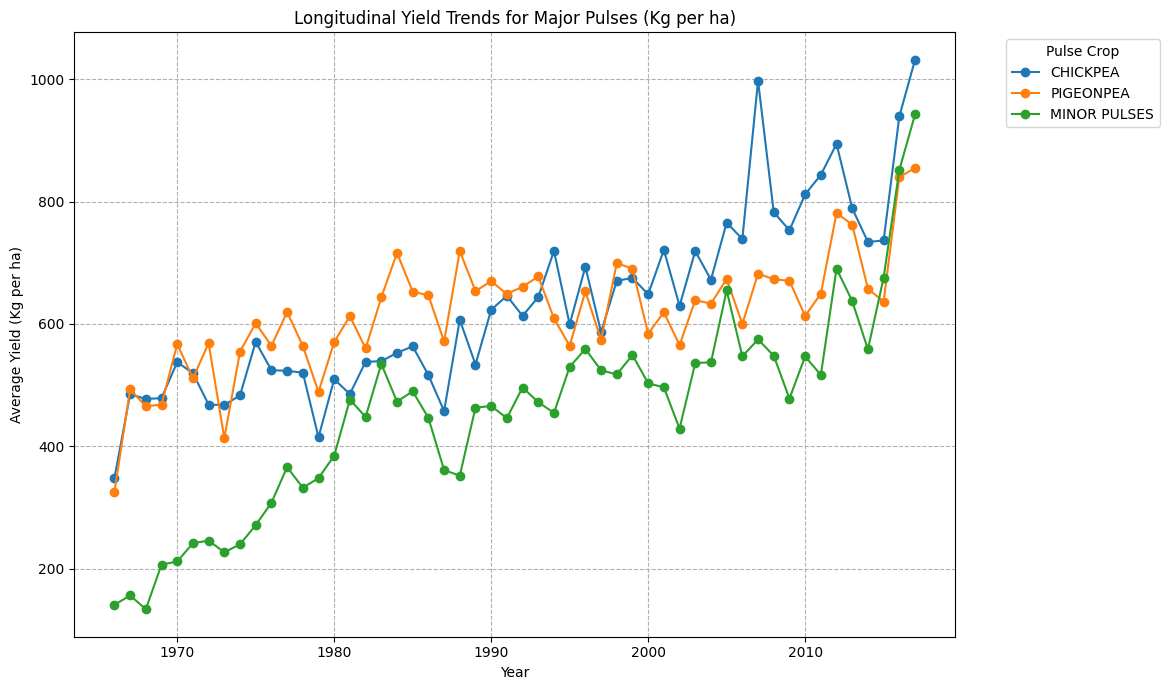

In [24]:
# Identify yield columns for major pulses
pulse_yield_cols = [col for col in df.columns if 'YIELD (Kg per ha)' in col and any(pulse in col for pulse in ['CHICKPEA', 'PIGEONPEA', 'MINOR PULSES'])]

# Group by year and calculate the average yield for each pulse crop
yearly_pulse_yields = df.groupby('Year')[pulse_yield_cols].mean()

print("Average Yearly Yields (Kg per ha) for Major Pulses:")
display(yearly_pulse_yields.head()) # Displaying head as the table can be large

# Create a line chart to visualize the longitudinal yield trends for major pulses
plt.figure(figsize=(14, 7))

for col in yearly_pulse_yields.columns:
    plt.plot(yearly_pulse_yields.index, yearly_pulse_yields[col], marker='o', linestyle='-', label=col.replace(' YIELD (Kg per ha)', ''))

plt.title('Longitudinal Yield Trends for Major Pulses (Kg per ha)')
plt.xlabel('Year')
plt.ylabel('Average Yield (Kg per ha)')
plt.grid(True, linestyle='--')
plt.legend(title='Pulse Crop', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
plt.show()

## Sorghum Production Patterns Analysis and Visualization

### Subtask:
Identify planting patterns for kharif and rabi sorghum.
Visualize planting patterns for kharif and rabi sorghum across different districts using a heatmap.

**Reasoning**:
This addresses the second hard question. It involves selecting the relevant columns for Kharif and Rabi sorghum area, grouping the data by district, calculating the total area for each type of sorghum in each district, and then creating a heatmap to visualize the planting patterns across districts. A heatmap is suitable for showing the intensity of planting (area) for each sorghum type in different districts.

Total Kharif and Rabi Sorghum Area (1000 ha) by District (first 50 districts):


,KHARIF SORGHUM AREA (1000 ha),RABI SORGHUM AREA (1000 ha)
Dist Name,,
24 Parganas,0.00,0.00
Adilabad,3547.25,4587.43
Agra,116.26,0.00
Ahmedabad,2103.47,50.89
Ahmednagar,384.60,28128.60
Ajmer,6094.59,0.00
Akola,10294.77,26.19
Alappuzha,0.00,0.00
Aligarh,75.53,0.00


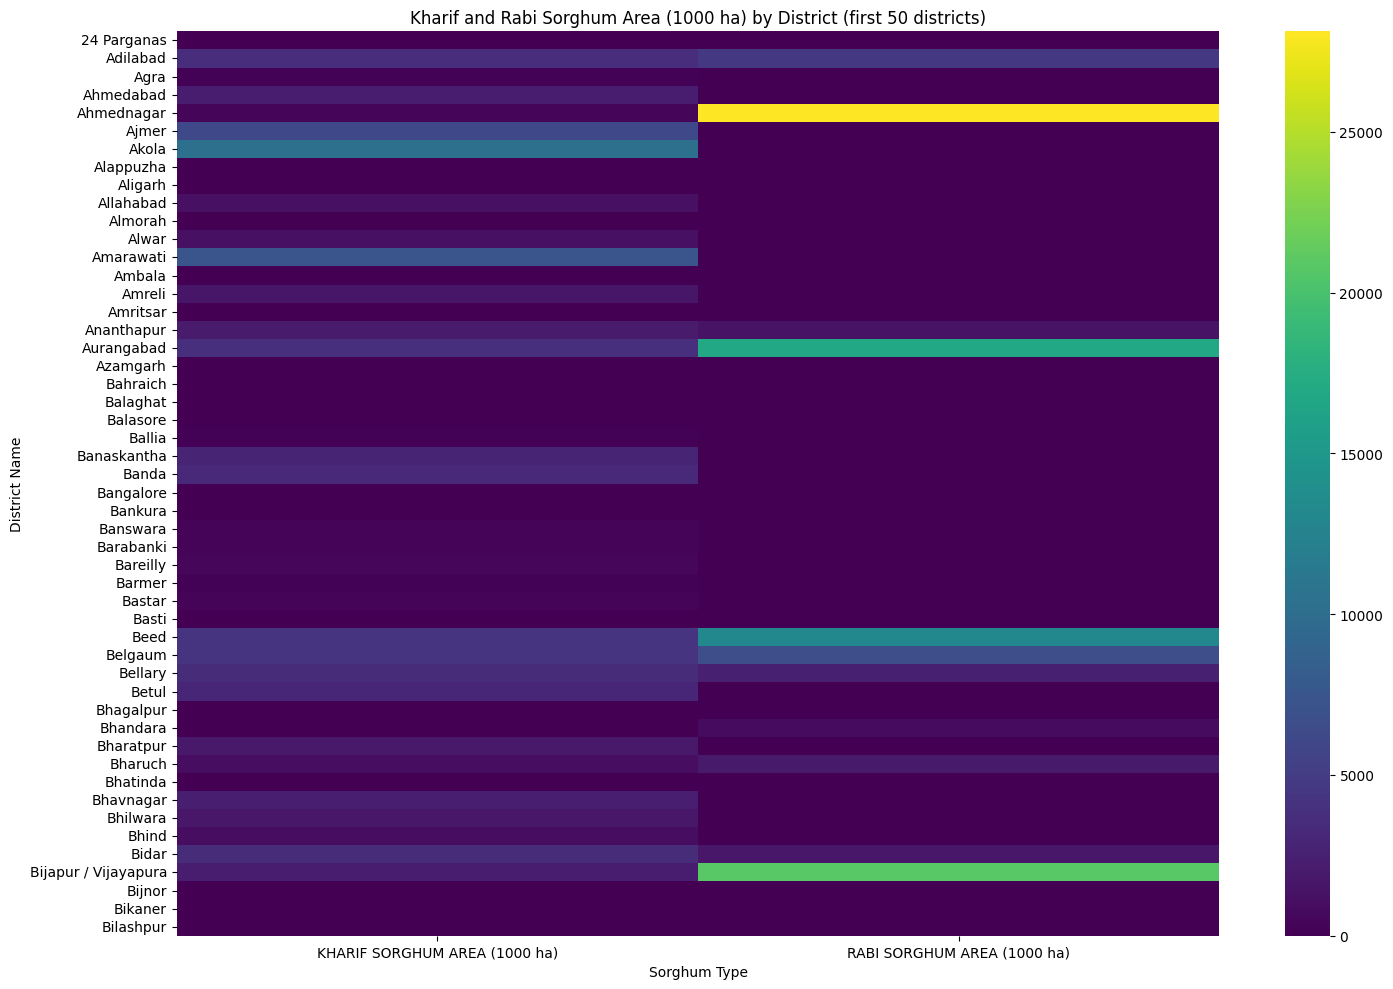

In [25]:
# Select the area columns for Kharif and Rabi Sorghum
sorghum_area_cols = ['KHARIF SORGHUM AREA (1000 ha)', 'RABI SORGHUM AREA (1000 ha)']

# Group by district and calculate the total area for each type of sorghum
district_sorghum_area = df.groupby('Dist Name')[sorghum_area_cols].sum()

print("Total Kharif and Rabi Sorghum Area (1000 ha) by District (first 50 districts):")
display(district_sorghum_area.head(50)) # Displaying head as the table can be large

# Create a heatmap to visualize the planting patterns across districts
plt.figure(figsize=(15, 10))
sns.heatmap(district_sorghum_area.head(50), cmap='viridis', annot=False) # Displaying head for better visualization
plt.title('Kharif and Rabi Sorghum Area (1000 ha) by District (first 50 districts)')
plt.xlabel('Sorghum Type')
plt.ylabel('District Name')
plt.tight_layout()
plt.show()

## Summarize Hard Question Findings

### Subtask:
Present the findings from the analysis of hard questions.

**Reasoning**:
This step is to summarize the findings from the analysis and visualizations performed for the hard questions, providing a clear and concise overview of the insights gained.

Based on the analysis of the hard questions:

**1. Longitudinal Yield Trends for Major Pulses:**
*   We analyzed how the average yields for Chickpea, Pigeonpea, and Minor Pulses have changed over the years.
*   The line chart visualizes these trends, allowing for a comparison of yield trajectories among these pulse crops.

**2. Sorghum Production Patterns:**
*   We examined the planting patterns of Kharif and Rabi sorghum across different districts by calculating the total area for each type in each district.
*   The heatmap provides a visual representation of these patterns, showing which districts have higher or lower areas dedicated to Kharif versus Rabi sorghum.

These findings offer deeper insights into the historical yield performance of major pulses and the geographical distribution of sorghum cultivation based on the provided dataset.